In [51]:
import itertools

import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [2]:
df_train = pd.read_csv("../data/heartbeat/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)

In [3]:
print(df_train.head(10))
print(df_train.describe())

            0         1         2         3         4         5         6    \
71452  0.060510  0.124204  0.257962  0.363057  0.474522  0.557325  0.678344   
17042  0.928889  0.842963  0.315556  0.154074  0.069630  0.010370  0.000000   
4014   1.000000  0.622699  0.073620  0.153374  0.141104  0.150307  0.141104   
51692  0.926000  0.842000  0.626000  0.342000  0.132000  0.088000  0.060000   
10112  1.000000  0.867925  0.493711  0.000000  0.097484  0.238994  0.339623   
48042  1.000000  0.798165  0.458716  0.220183  0.004587  0.027523  0.100917   
85724  1.000000  0.880952  0.562500  0.306548  0.119048  0.062500  0.059524   
14808  1.000000  0.731928  0.481928  0.234940  0.138554  0.027108  0.000000   
26370  1.000000  0.878698  0.544379  0.375740  0.245562  0.150888  0.097633   
36545  0.977848  0.819620  0.359177  0.068038  0.000000  0.093354  0.147152   

            7         8         9    ...  178  179  180  181  182  183  184  \
71452  0.732484  0.770701  0.761146  ...  0.0  0.0 

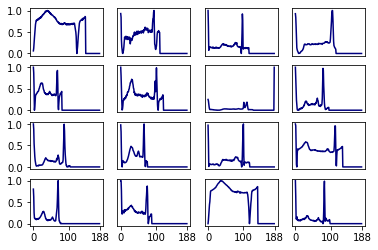

In [61]:
fig, axes = plt.subplots(nrows=4, ncols=4)

for i, ax in enumerate(fig.axes):
    df_train.iloc[i,:].plot(ax=ax, color='navy')
    ax.set_xticks([])
    ax.set_yticks([])
for i in [0, 4, 8, 12]:
    fig.axes[i].set_yticks([0, 0.5, 1])
for i in [12, 13, 14, 15]:
    fig.axes[i].set_xticks([0, 100, 188])    
plt.show()

In [ ]:
X = df_train

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit(X)
X_pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X=X)

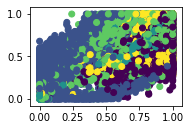

In [27]:
plt.subplot(221)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)

In [31]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X=X_pca)

TypeError: float() argument must be a string or a number, not 'PCA'

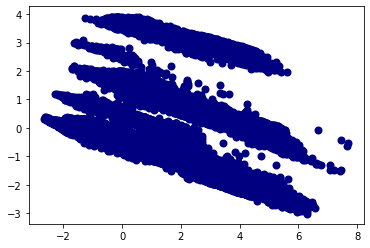

In [56]:
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, color='navy')
plt.show()

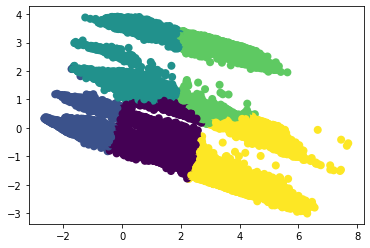

In [57]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X=X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred)

In [60]:
optics = OPTICS(min_samples=100).fit(X_ipca)
y_pred = optics.fit_predict(X=X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred)

KeyboardInterrupt: 

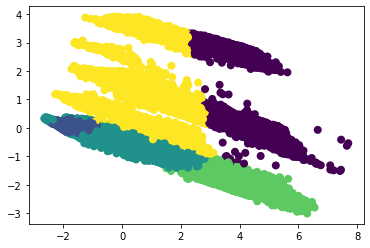

In [58]:
gmm = GaussianMixture(n_components=5, covariance_type='full',
                              max_iter=100).fit(X_ipca)
y_pred = gmm.predict(X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred)